# Hierarchical Clustering

In [48]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

## 1. Read the data

In [2]:
data_path  = "datasets/cancer.csv"

In [5]:
cancer_data = pd.read_csv(data_path)
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2. View the data

In [8]:
print(cancer_data.columns)

print(cancer_data.shape)

print(cancer_data.describe())

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
(569, 31)
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000   

In [7]:
cancer_data.duplicated().any()

False

## 3. Scatter Plots

Text(0, 0.5, 'smoothness_worst')

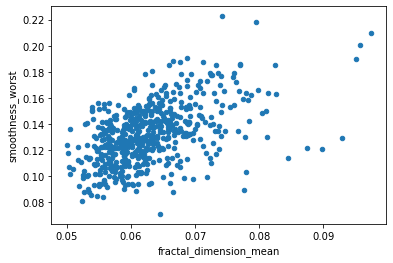

In [16]:
ax1 = fig1.add_subplot(1,2,1,title='Column Scatter Plot')
cancer_data.plot.scatter("fractal_dimension_mean", "smoothness_worst")
ax1.set_xlabel('fractal_dimension_mean',)
ax1.set_ylabel('smoothness_worst',)

In [23]:
# Add coloud
cancer_data["target"] = pd.Series(np.where(cancer_data.diagnosis.values == "M", 1, 0),
                                  cancer_data.index)
print(cancer_data.target.value_counts())
print(cancer_data.diagnosis.value_counts())

0    357
1    212
Name: target, dtype: int64
B    357
M    212
Name: diagnosis, dtype: int64


Text(0, 0.5, 'smoothness_worst')

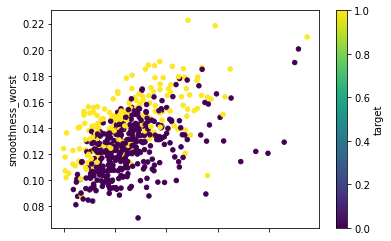

In [25]:
ax1 = fig1.add_subplot(1,2,1,title='Column Scatter Plot')
cancer_data.plot.scatter("fractal_dimension_mean", "smoothness_worst", 
                         c="target", colormap='viridis')
ax1.set_xlabel('fractal_dimension_mean',)
ax1.set_ylabel('smoothness_worst',)

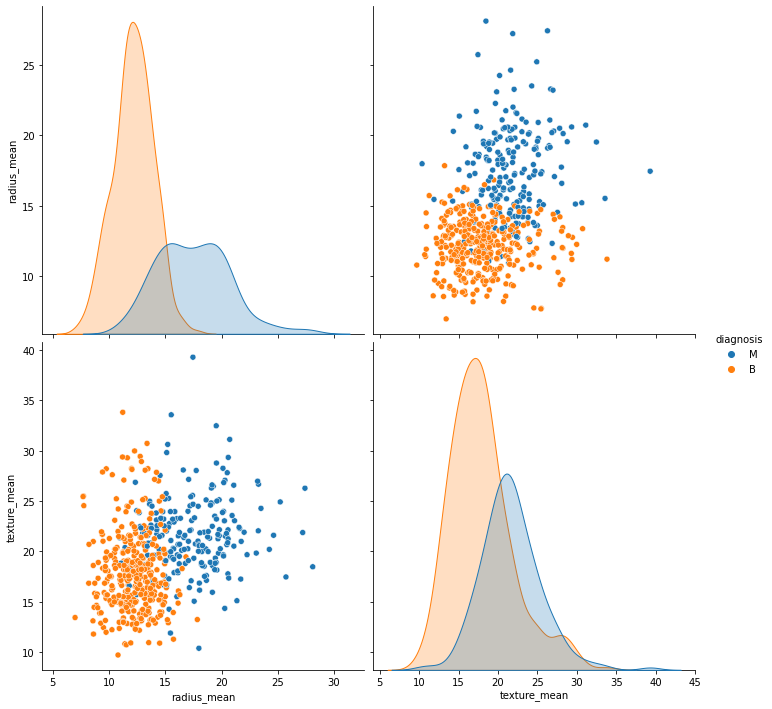

In [28]:
# Med seaborn 
sb.pairplot(cancer_data[['radius_mean','texture_mean', 'diagnosis']], 
             hue="diagnosis", height=5)

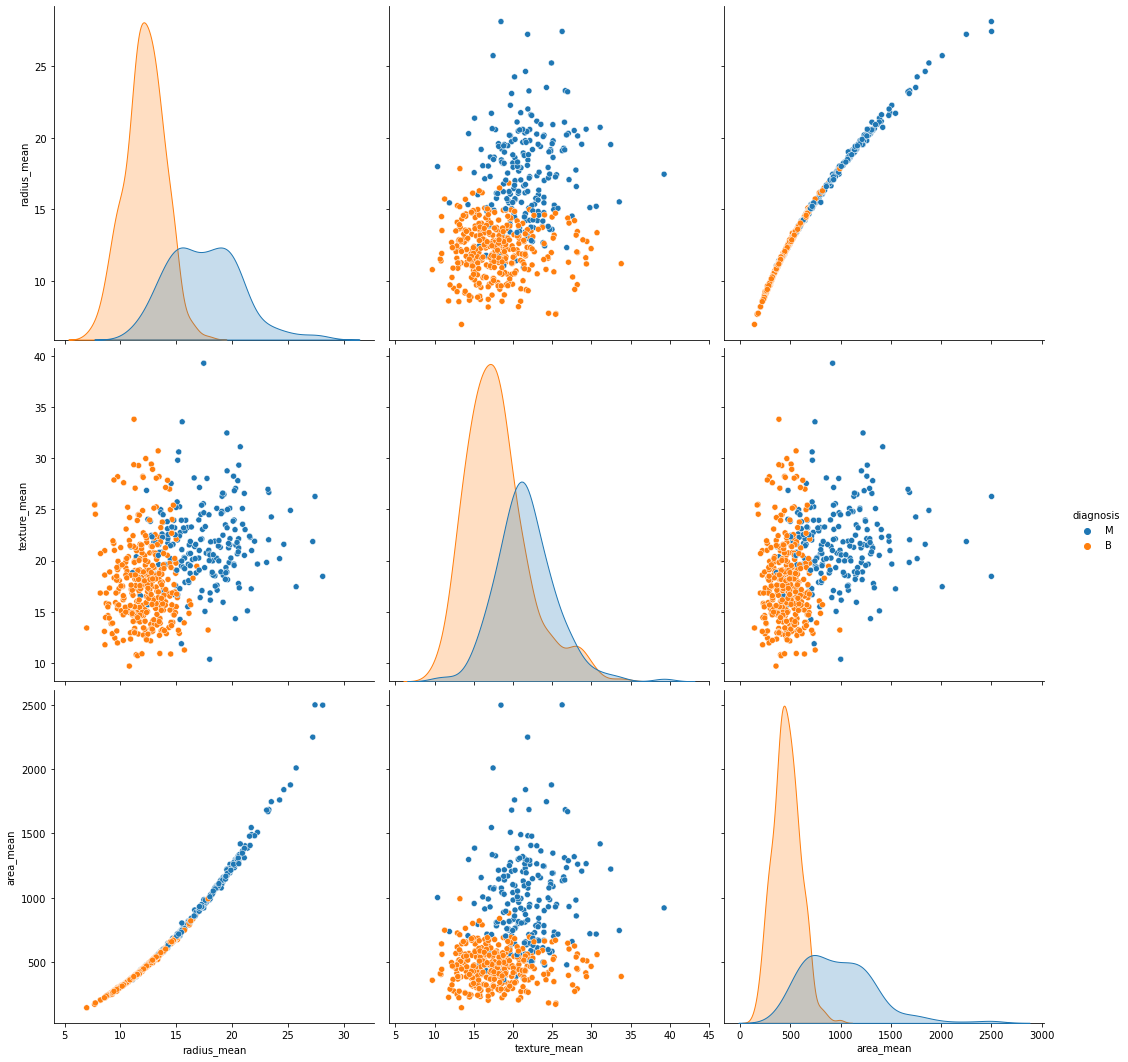

In [29]:
sb.pairplot(cancer_data[['radius_mean','texture_mean', 'diagnosis', 'area_mean']], 
             hue="diagnosis", height=5)

## 4. Linkage 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)

## 5. Applying Linkage

In [33]:
# creer une matrice
X = cancer_data[cancer_data.columns[1:]].to_numpy()
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 4.601e-01 1.189e-01 1.000e+00]
 [2.057e+01 1.777e+01 1.329e+02 ... 2.750e-01 8.902e-02 1.000e+00]
 [1.969e+01 2.125e+01 1.300e+02 ... 3.613e-01 8.758e-02 1.000e+00]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 2.218e-01 7.820e-02 1.000e+00]
 [2.060e+01 2.933e+01 1.401e+02 ... 4.087e-01 1.240e-01 1.000e+00]
 [7.760e+00 2.454e+01 4.792e+01 ... 2.871e-01 7.039e-02 0.000e+00]]


In [35]:
dend = linkage(X, method="ward")
print(dend)

[[2.87000000e+02 3.36000000e+02 3.81596727e+00 2.00000000e+00]
 [1.06000000e+02 4.20000000e+02 4.11664267e+00 2.00000000e+00]
 [5.50000000e+01 2.51000000e+02 4.93361024e+00 2.00000000e+00]
 ...
 [1.13000000e+03 1.13200000e+03 6.19607483e+03 8.60000000e+01]
 [1.13100000e+03 1.13300000e+03 8.36899627e+03 4.83000000e+02]
 [1.13400000e+03 1.13500000e+03 1.83711051e+04 5.69000000e+02]]


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [41.25, 41.25, 90.0, 90.0],
  [15.0, 15.0, 65.625, 65.625],
  [5.0, 5.0, 40.3125, 40.3125],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [145.0, 145.0, 170.0, 170.0],
  [122.5, 122.5, 157.5, 157.5],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [255.0, 255.0, 265.0, 265.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [260.0, 260.0, 283.75, 283.75],
  [221.25, 221.25, 271.875, 271.875],
  [195.0, 195.0, 246.5625, 246.5625],
  [140.0, 140.0, 220.78125, 220.78125],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  

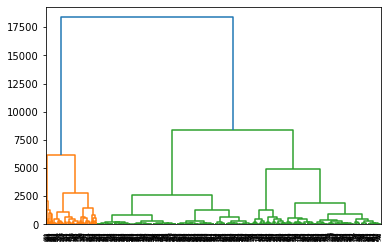

In [36]:
dendrogram(dend)

## 8. skearn Agglomerative Clustering 

In [38]:
agg_clust = AgglomerativeClustering(n_clusters = 2, affinity = 
"euclidean", linkage = "ward")

In [40]:
cluster_labels = agg_clust.fit_predict(X)
cancer_data["cluster"] = cluster_labels
print(cancer_data["cluster"].value_counts())

0    483
1     86
Name: cluster, dtype: int64


## 10. Remake Scatterplots with Cluster Colouring

Text(0, 0.5, 'smoothness_worst')

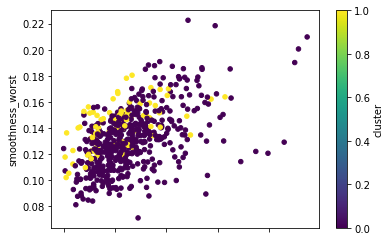

In [41]:
ax1 = fig1.add_subplot(1,2,1,title='Column Scatter Plot')
cancer_data.plot.scatter("fractal_dimension_mean", "smoothness_worst", 
                         c="cluster", colormap='viridis')
ax1.set_xlabel('fractal_dimension_mean',)
ax1.set_ylabel('smoothness_worst',)

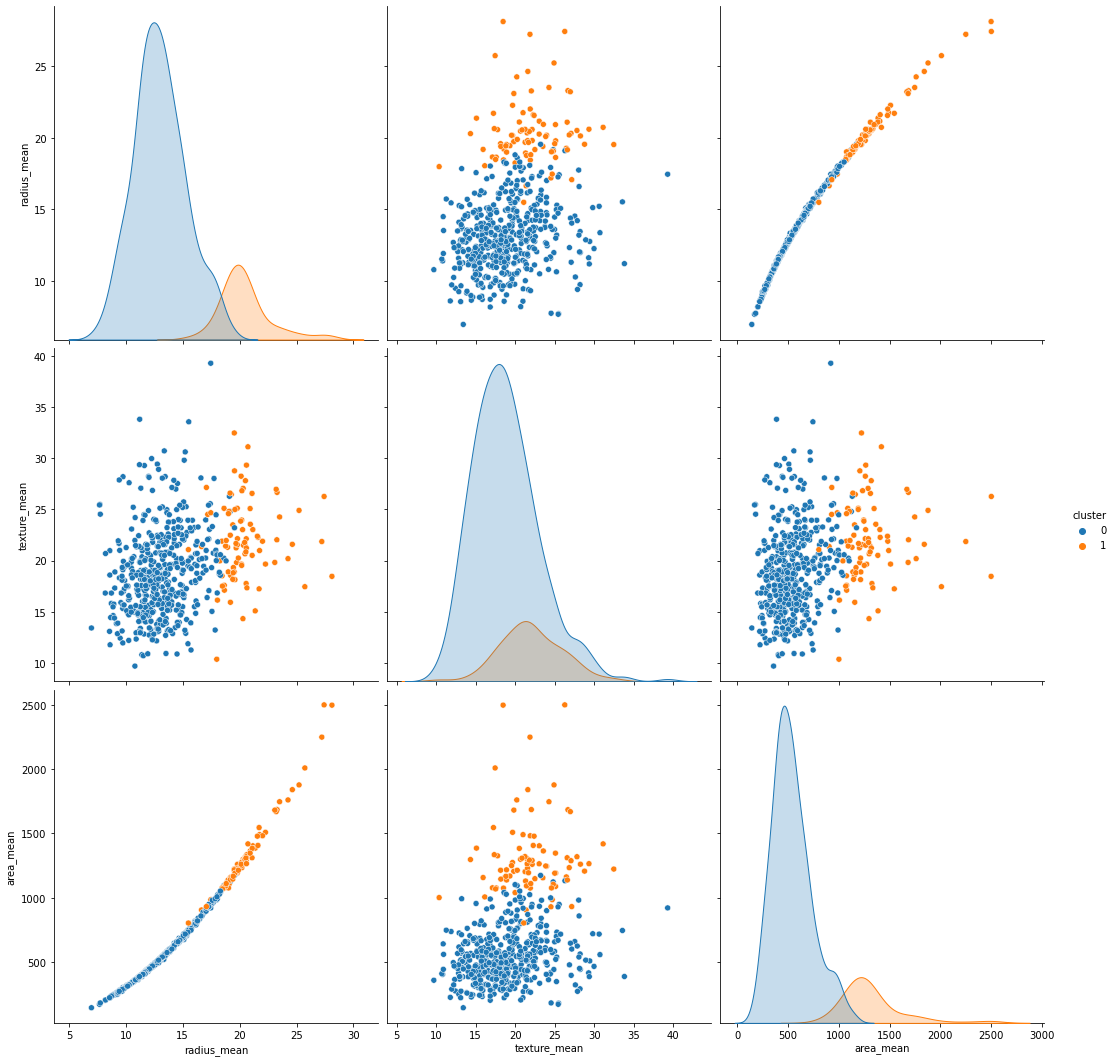

In [42]:
sb.pairplot(cancer_data[['radius_mean','texture_mean', 'cluster', 'area_mean']], 
             hue="cluster", height=5)

## 11. Hierarchical clustering task using AgglomerativeClustering
Repeat the hierarchical clustering task using AgglomerativeClustering by increasing the 
number of cluster from 2 to 10. Scatterplot the corresponding results for every n_clusters

In [45]:
agg_clust = AgglomerativeClustering(n_clusters = 10, affinity = 
"euclidean", linkage = "ward")
cluster_labels = agg_clust.fit_predict(X)
cancer_data["cluster"] = cluster_labels
print(cancer_data["cluster"].value_counts())

6    136
0    130
5    114
1     57
2     46
8     46
9     20
3     10
4      9
7      1
Name: cluster, dtype: int64


Text(0, 0.5, 'smoothness_worst')

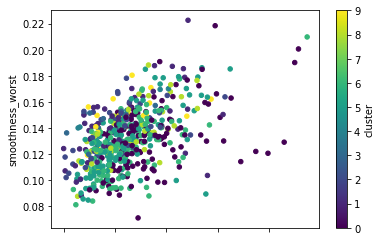

In [46]:
ax1 = fig1.add_subplot(1,2,1,title='Column Scatter Plot')
cancer_data.plot.scatter("fractal_dimension_mean", "smoothness_worst", 
                         c="cluster", colormap='viridis')
ax1.set_xlabel('fractal_dimension_mean',)
ax1.set_ylabel('smoothness_worst',)

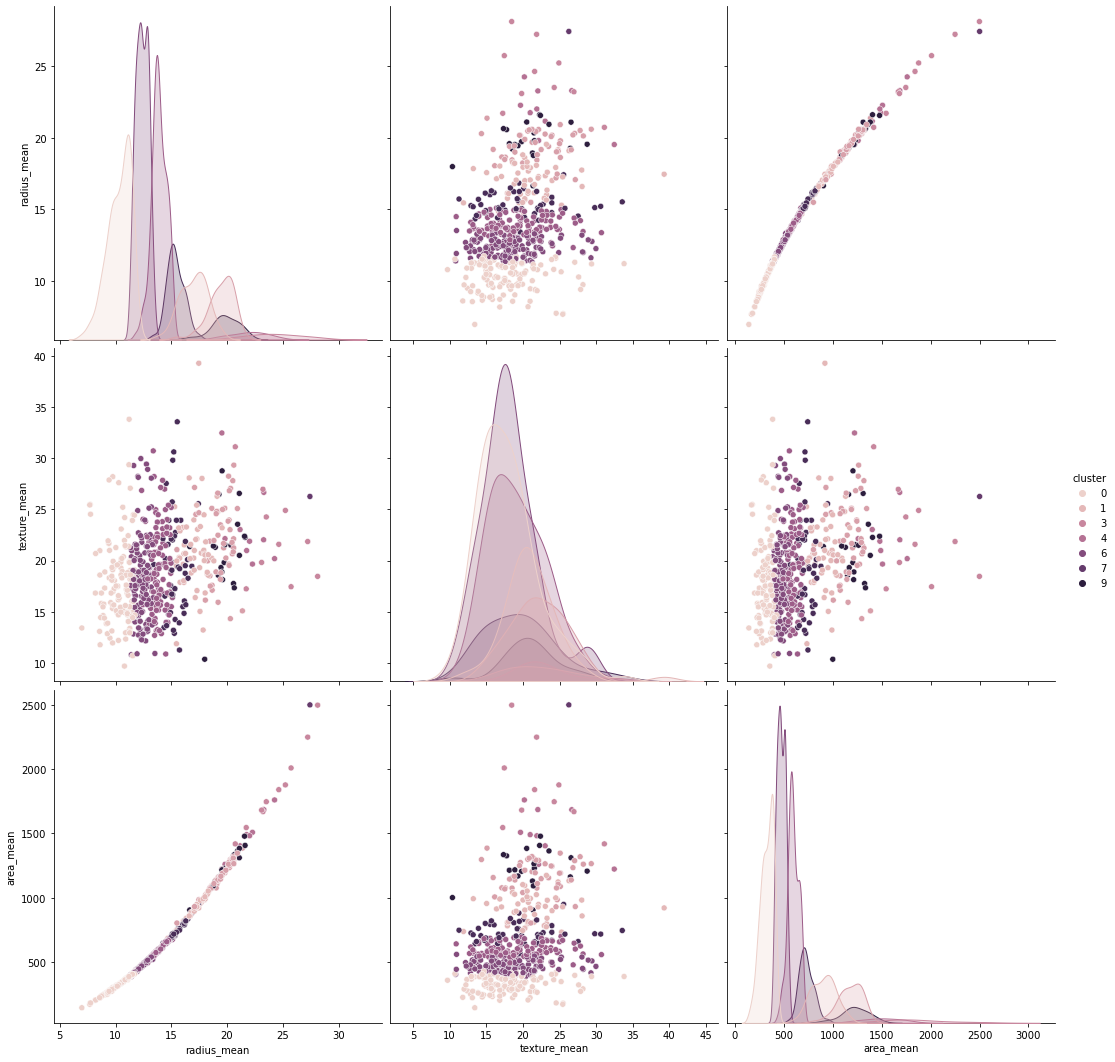

In [47]:
sb.pairplot(cancer_data[['radius_mean','texture_mean', 'cluster', 'area_mean']], 
             hue="cluster", height=5)

## 12. Silhouette Score

In [79]:
class silhouette():
    def __init__(self, x, n):
        self.x = x
        self.n = n
        self.best_score = 0
        self.best_ncluster = 0
    
    def find_best_silscore(self):
        for i in range(1, self.n):
            agg_clust = AgglomerativeClustering(n_clusters = i+1, affinity = 
            "euclidean", linkage = "ward")
            agg_clust.fit_predict(self.x)
            sil_score = silhouette_score(self.x, agg_clust.labels_, metric='euclidean')
            print(f"n clusters: {i+1} \nSilhouette Score: {sil_score} \n")
            if self.best_score < sil_score:
                self.best_score = sil_score
                self.best_ncluster = i+1
    
    def print_best(self):
        print(f"Best n clusters: {self.best_ncluster} \nBest Silhouette Score: {self.best_score}")

In [80]:
silo = silhouette(x=X, n=10)

In [81]:
silo.find_best_silscore()

n clusters: 2 
Silhouette Score: 0.6899793200055596 

n clusters: 3 
Silhouette Score: 0.5082533207826048 

n clusters: 4 
Silhouette Score: 0.5090022049442345 

n clusters: 5 
Silhouette Score: 0.5114434216758691 

n clusters: 6 
Silhouette Score: 0.5051775144868977 

n clusters: 7 
Silhouette Score: 0.4354261741836538 

n clusters: 8 
Silhouette Score: 0.43564036286792907 

n clusters: 9 
Silhouette Score: 0.43416788842949544 

n clusters: 10 
Silhouette Score: 0.42971924761806474 



In [82]:
silo.print_best()

Best n clusters: 2 
Best Silhouette Score: 0.6899793200055596


## Questions
What is an application of this? 